In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/merged_data.csv')
df.head()

Area   Item  Year  Yield  avg_temp  Pesticides avg_precipitation
0  Albania  Maize  1990  36613     16.37       121.0              1485
1  Albania  Maize  1991  29068     15.36       121.0              1485
2  Albania  Maize  1992  24876     16.06       121.0              1485
3  Albania  Maize  1993  24185     16.05       121.0              1485
4  Albania  Maize  1994  25848     16.96       201.0              1485

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               28248 non-null  object 
 1   Item               28248 non-null  object 
 2   Year               28248 non-null  int64  
 3   Yield              28248 non-null  int64  
 4   avg_temp           28248 non-null  float64
 5   Pesticides         28248 non-null  float64
 6   avg_precipitation  28248 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
df.describe()

Year          Yield      avg_temp     Pesticides
count  28248.000000   28248.000000  28248.000000   28248.000000
mean    2001.541950   77047.863282     20.543722   37069.136973
std        7.052997   84950.194454      6.311828   59954.787836
min     1990.000000      50.000000      1.300000       0.040000
25%     1995.000000   19918.750000     16.710000    1695.710000
50%     2001.000000   38295.000000     21.510000   17517.760000
75%     2008.000000  104598.250000     26.000000   48687.880000
max     2013.000000  501412.000000     30.650000  367778.000000

In [5]:
# only categorical columns
df.describe(include='object')

Area      Item avg_precipitation
count   28248     28248             28248
unique    101        10               101
top     India  Potatoes              1083
freq     4048      4276              4048

In [7]:
df.isnull().sum()

Area                 0
Item                 0
Year                 0
Yield                0
avg_temp             0
Pesticides           0
avg_precipitation    0
dtype: int64

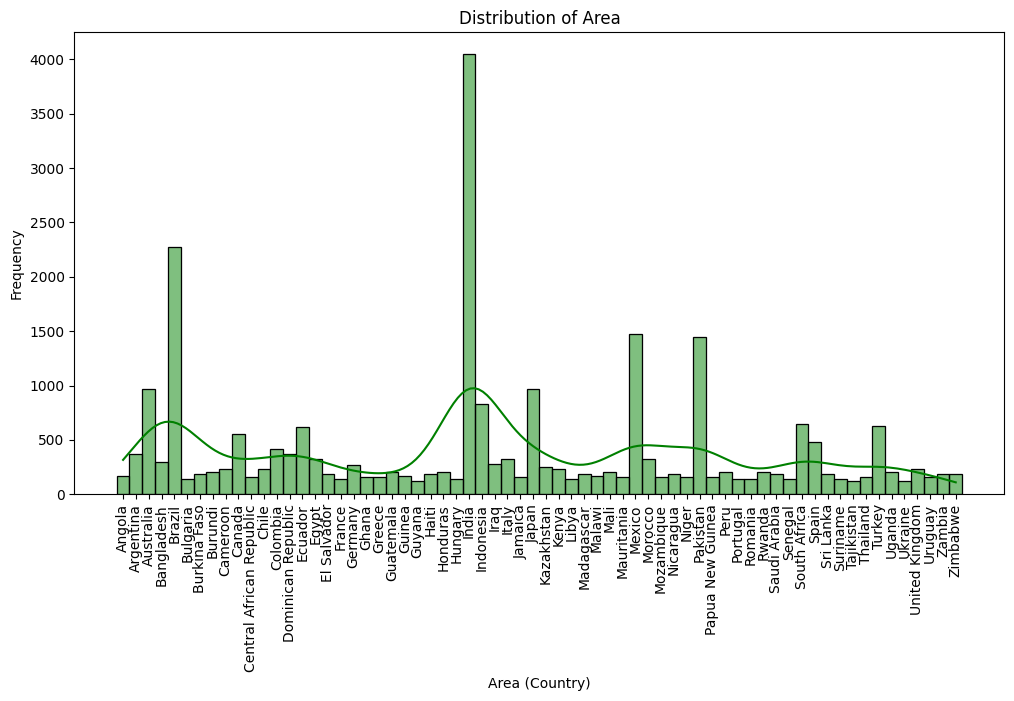

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df['Area'], bins=30, kde=True, color='green')
plt.title('Distribution of Area')
plt.xticks(rotation=90)
plt.xlabel('Area (Country)')
plt.ylabel('Frequency')
plt.show()


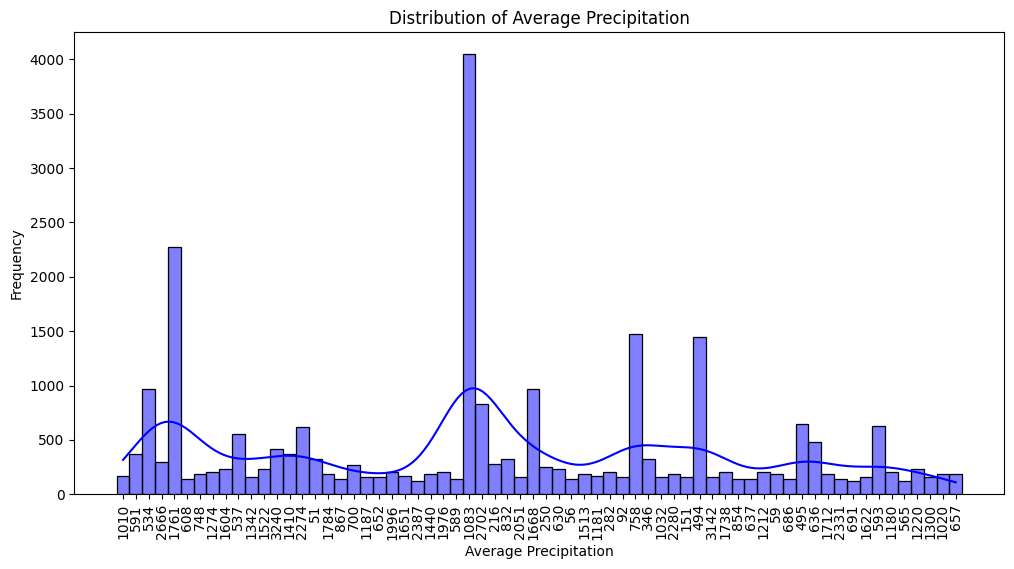

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df['avg_precipitation'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Precipitation')
plt.xticks(rotation=90)
plt.xlabel('Average Precipitation')
plt.ylabel('Frequency')
plt.show()

In [3]:
# in order to prevent the data from being skewed, I remove countries with less 120 records
# countries are in column Area
countries_list = df['Area'].value_counts()
drop_list = countries_list[countries_list < 120].index.tolist()
filtered_data = df[~df['Area'].isin(drop_list)]
df = filtered_data.reset_index(drop=True)
df.shape

(25746, 7)

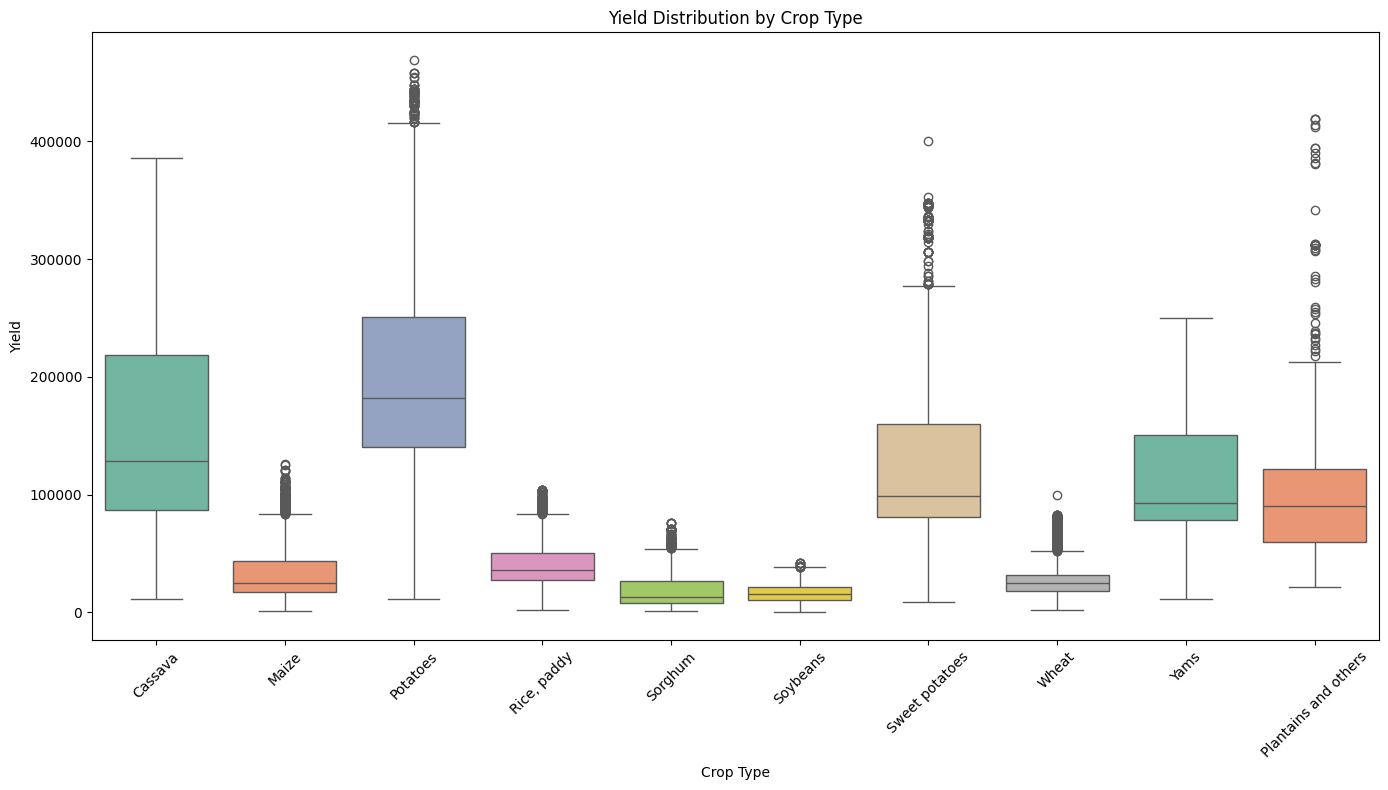

In [ ]:
# Yield distribution by item using boxplot 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Item', y='Yield', data=df, hue='Item', dodge=False, palette="Set2", legend=False)
plt.xticks(rotation=45) 
plt.title('Yield Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield')
plt.tight_layout()
plt.show()

<AxesSubplot: >

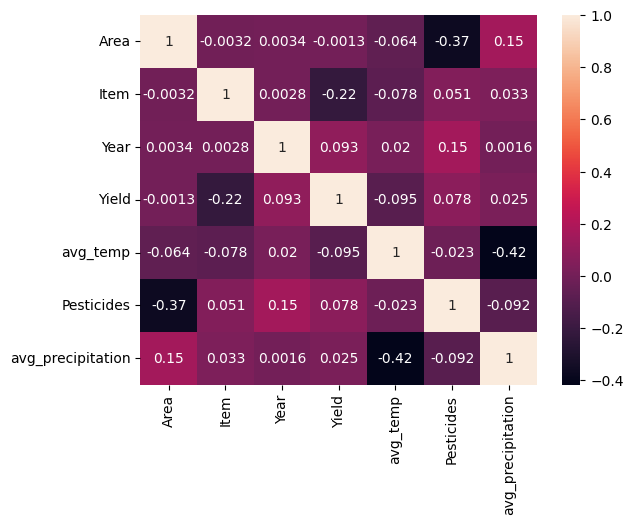

In [4]:
# Correlation Matrix
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
     df_copy[column] = label_encoder.fit_transform(df_copy[column])
    
 
sns.heatmap(df_copy.corr() , annot= True)

In [46]:
df.columns

Index(['Area', 'Item', 'Year', 'Yield', 'avg_temp', 'Pesticides',
       'avg_precipitation'],
      dtype='object')

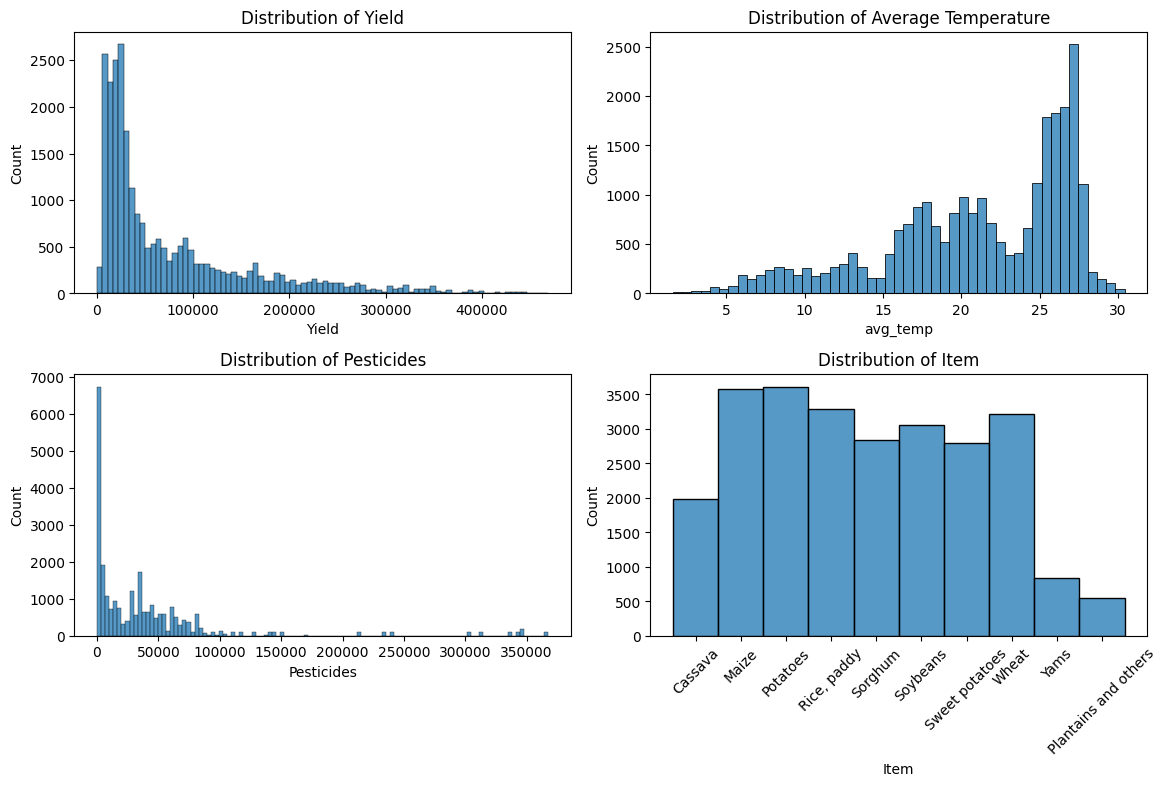

In [56]:
# check for distribution:

# Distribution plots
sns.color_palette("rocket")
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
sns.histplot(df['Yield'], ax=axes[0, 0]).set_title('Distribution of Yield')
sns.histplot(df['avg_temp'], ax=axes[0, 1]).set_title('Distribution of Average Temperature')
sns.histplot(df['Pesticides'], ax=axes[1, 0]).set_title('Distribution of Pesticides')
sns.histplot(df['Item'], ax=axes[1, 1]).set_title('Distribution of Item')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Yield vs. Average Temperature')

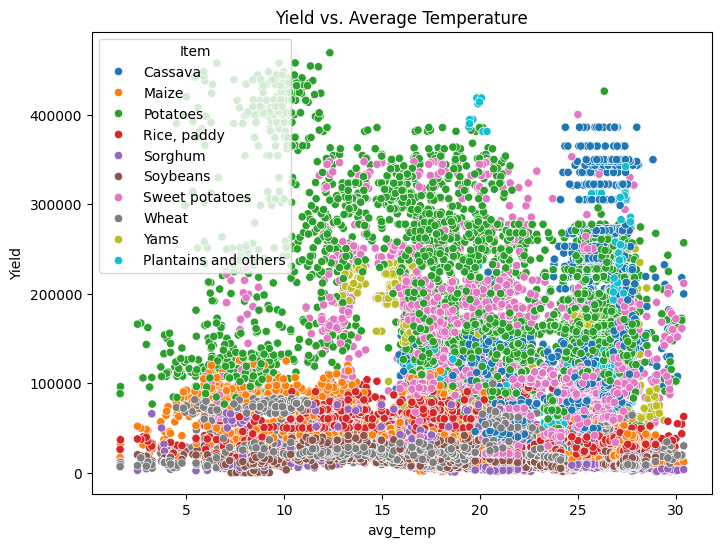

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_temp', y='Yield', data=df, hue='Item')
plt.title('Yield vs. Average Temperature')


Text(0.5, 1.0, 'Yield vs. Average Pesticides')

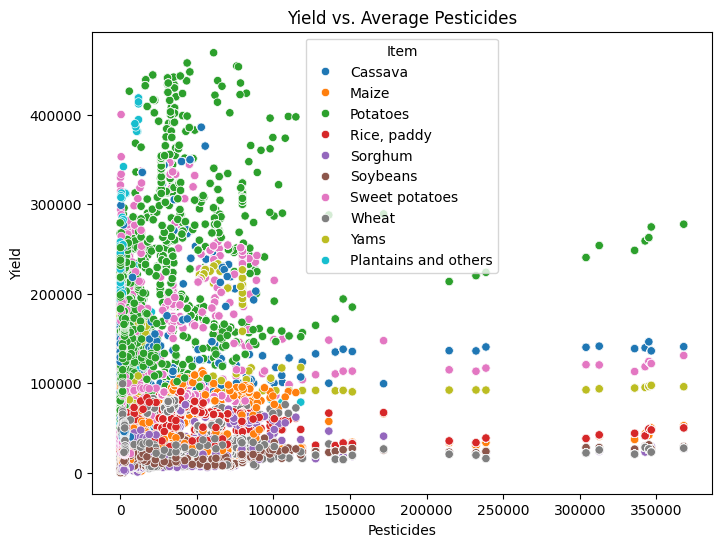

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pesticides', y='Yield', data=df, hue='Item')
plt.title('Yield vs. Average Pesticides')

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_precipitation', y='Yield', data=df, hue='Item')
plt.title('Yield vs. Average Precipitation')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Ensure 'Yield' is a numerical data type
df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')

# Drop NaN values that may have resulted from conversion
df.dropna(subset=['Yield'], inplace=True)

# Use cut to split 'Area' into 6 quantiles
df['group'] = pd.cut(df['Area'].astype('category').cat.codes, bins=6, labels=False)

# Group by the new 'group' column and 'Area', then sum 'Yield'
grouped_yield = df.groupby(['group', 'Area'])['Yield'].sum().reset_index()

# Sort the results by 'group' and 'Yield' to compare total yields
sorted_grouped_yield = grouped_yield.sort_values(by=['group', 'Yield'], ascending=[True, False])

display(sorted_grouped_yield)

group        Area      Yield
4       0      Brazil  167550306
2       0   Australia  109111062
9       0      Canada   34706922
1       0   Argentina   32864032
3       0  Bangladesh   15440318
..    ...         ...        ...
60      5      Uganda    7494314
65      5    Zimbabwe    7408629
64      5      Zambia    7254311
57      5  Tajikistan    6295210
61      5     Ukraine    5496901

[66 rows x 3 columns]

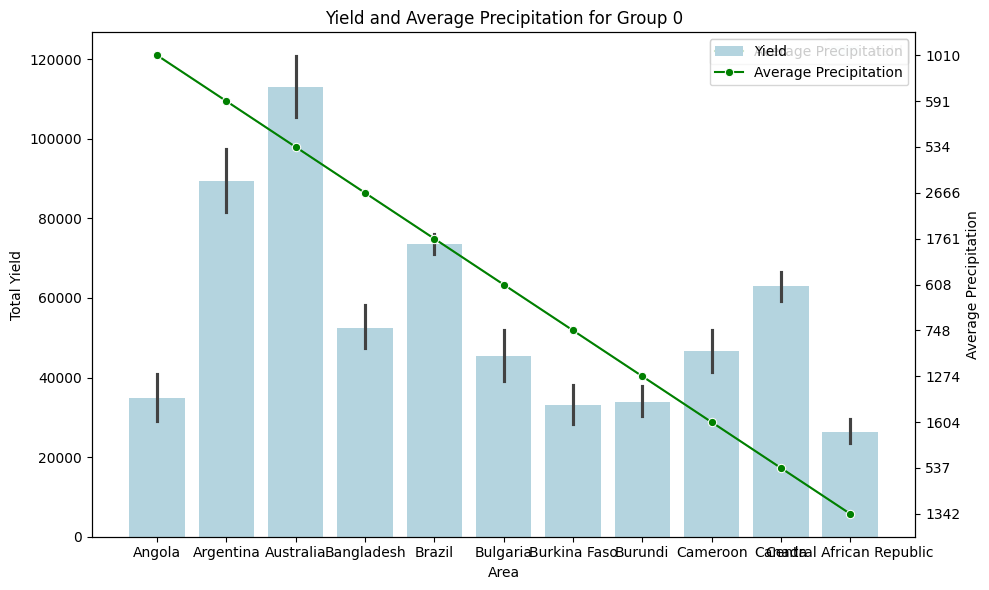

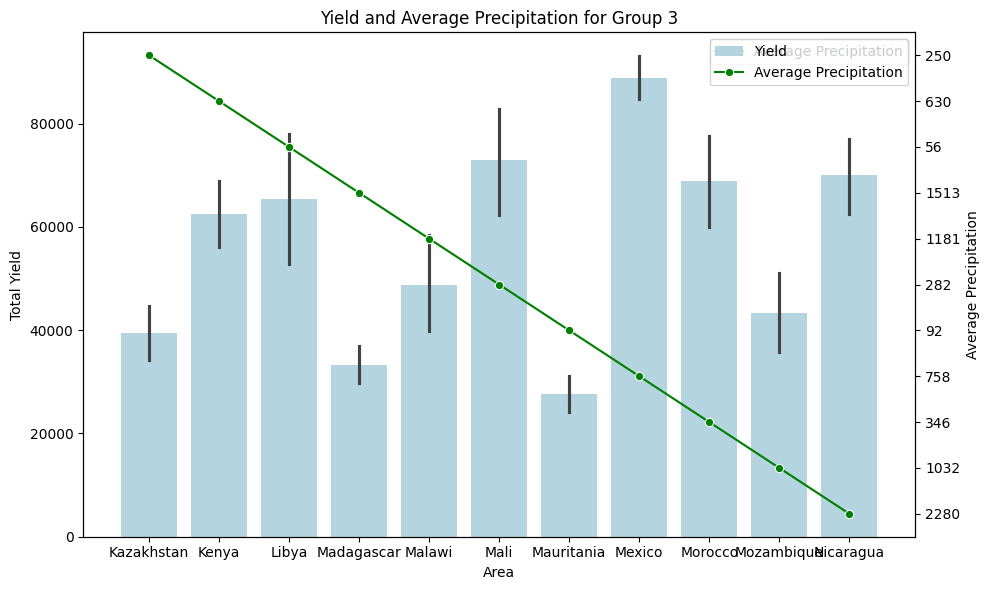

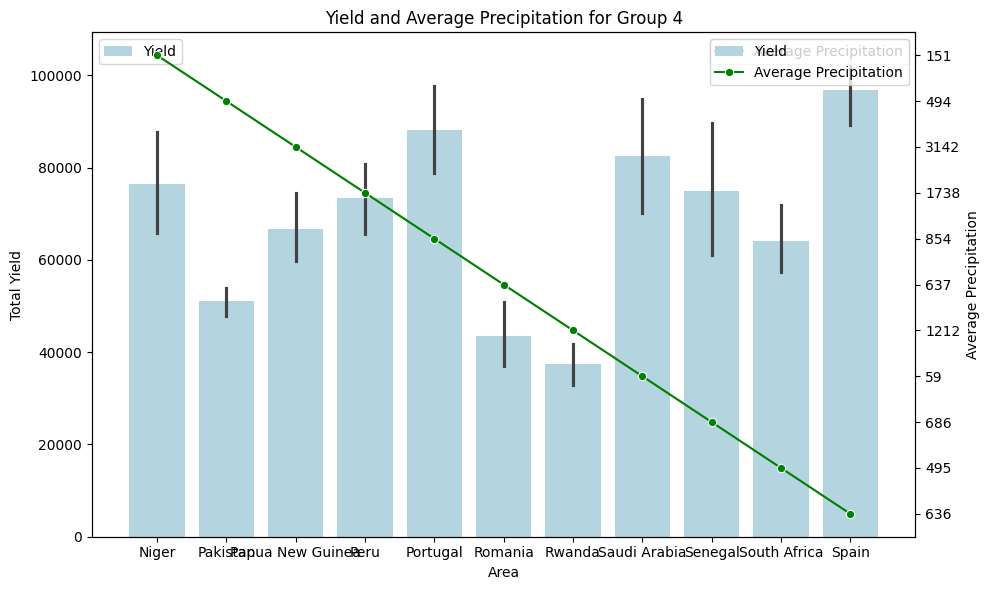

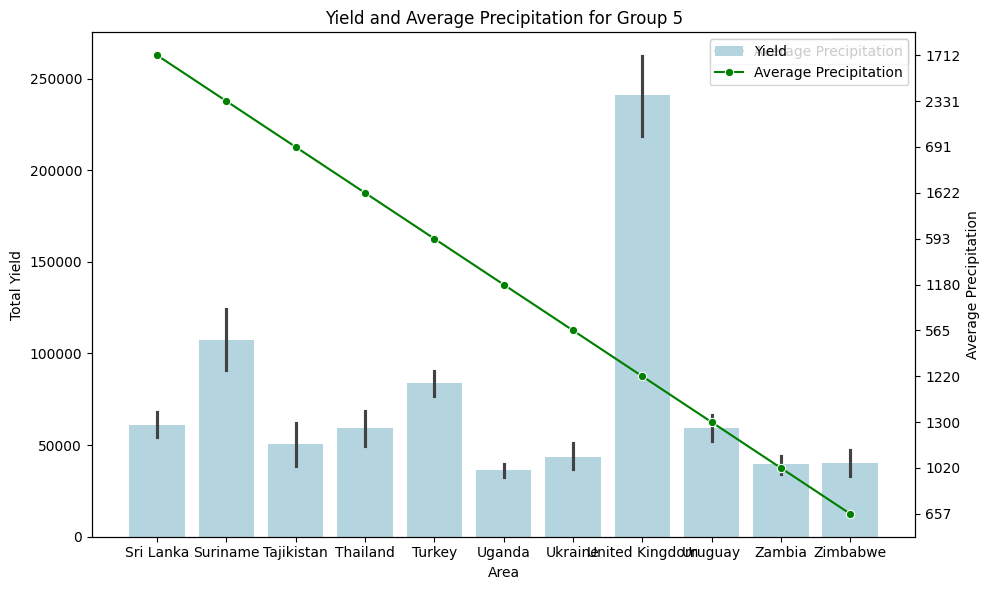

In [7]:
# visualize the yield and precipitation for the Area's for each group
# source:
# https://github.com/jordanwheeler7/capstone-crop-yield/blob/main/crop_yield.ipynb
for group in df['group'].unique():
    group_data = df[df['group'] == group]
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for Yield in the group
    sns.barplot(x='Area', y='Yield', data=group_data, ax=ax1, color='lightblue', label='Yield')
    
    # Create a second y-axis for the average precipitation
    ax2 = ax1.twinx()
    
    # Line plot for average precipitation in the group
    sns.lineplot(x='Area', y='avg_precipitation', data=group_data, ax=ax2, color='green', marker='o', label='Average Precipitation')
    
    # Final plot adjustments
    ax1.set_title(f'Yield and Average Precipitation for Group {group}')
    ax1.set_ylabel('Total Yield')
    ax2.set_ylabel('Average Precipitation')
    ax1.set_xlabel('Area')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

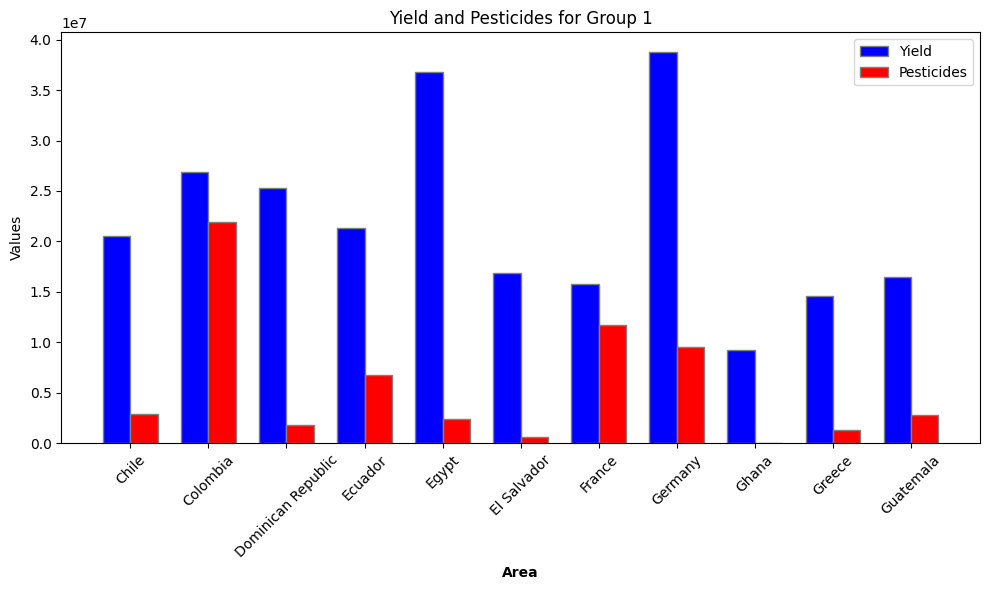

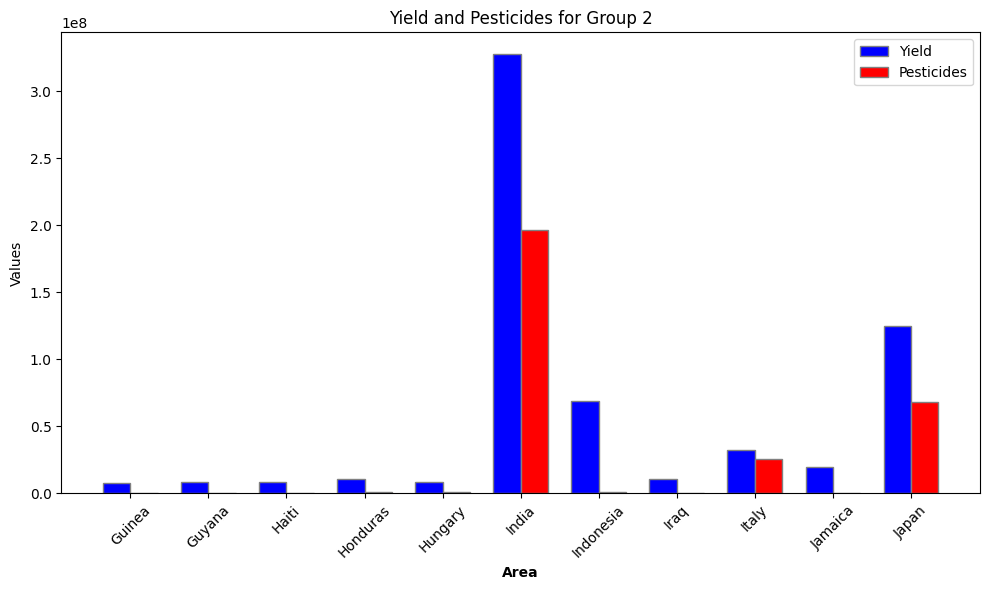

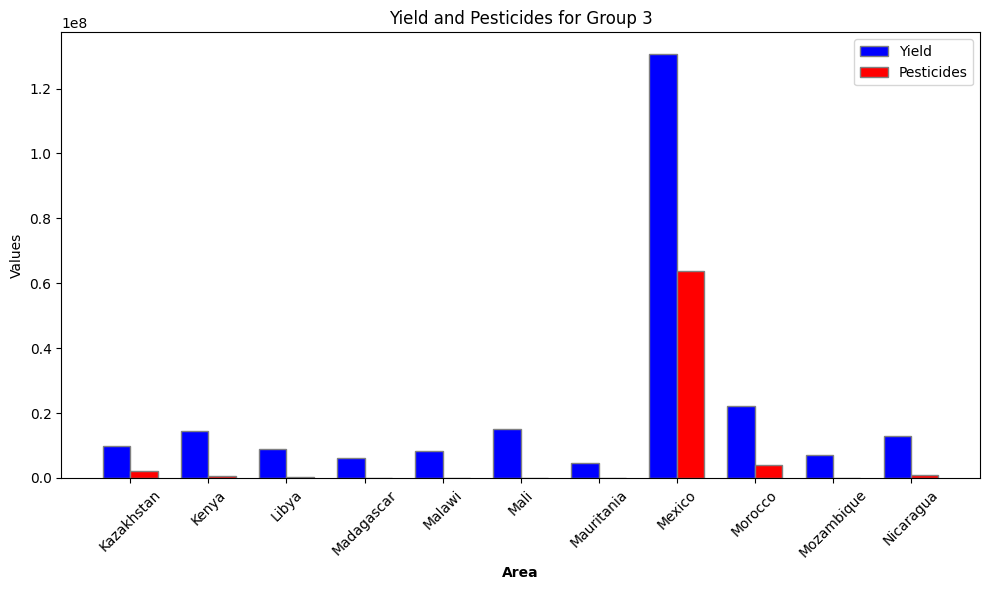

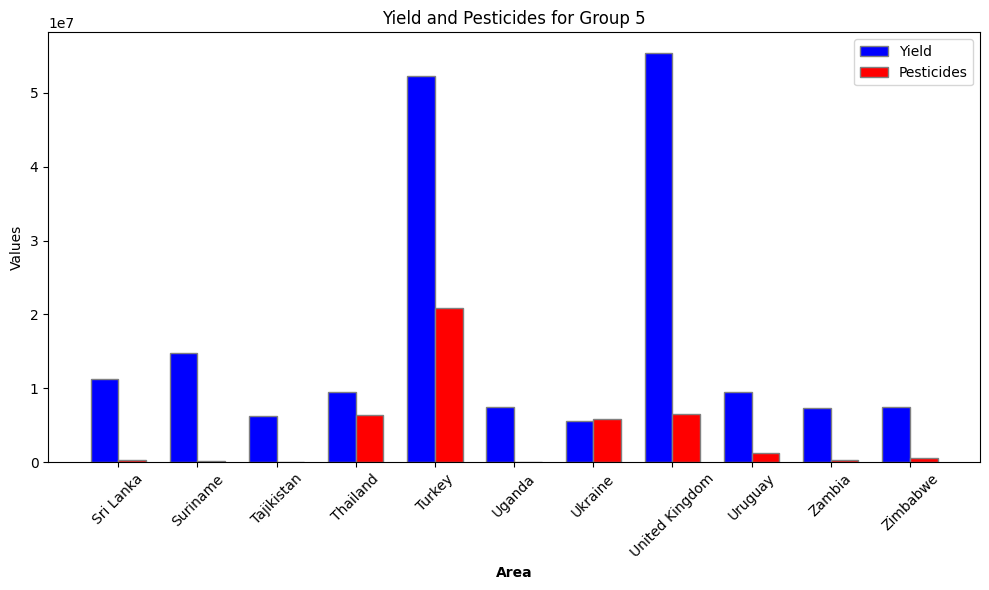

In [8]:
# source:
# https://github.com/jordanwheeler7/capstone-crop-yield/blob/main/crop_yield.ipynb
# Define the bar width for the clustered bar chart
bar_width = 0.35

# Loop through each group and create separate clustered bar charts for Yield and Pesticides
for group in sorted(df['group'].unique()):
    group_data = df[df['group'] == group]
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the positions of the bars on the x-axis
    areas = group_data['Area'].unique()
    r1 = range(len(areas))
    r2 = [x + bar_width for x in r1]

    # Calculate sum of Yield and Pesticides for each area within the group
    yield_sums = group_data.groupby('Area')['Yield'].sum()
    pesticide_sums = group_data.groupby('Area')['Pesticides'].sum()

    # Make the plots
    plt.bar(r1, yield_sums, color='blue', width=bar_width, edgecolor='grey', label='Yield')
    plt.bar(r2, pesticide_sums, color='red', width=bar_width, edgecolor='grey', label='Pesticides')

    # Add labels, title, and legend
    plt.xlabel('Area', fontweight='bold')
    plt.ylabel('Values')
    plt.title(f'Yield and Pesticides for Group {group}')
    plt.xticks([r + bar_width / 2 for r in range(len(r1))], areas, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [10]:
# Create an interactive scatter plot
import plotly.express as px
fig = px.scatter(df, x='Pesticides', y='Yield', color='Item',
                 hover_data=['Item'], title='Yield vs Pesticides Use by Crop')

# Show the plot
fig.show()

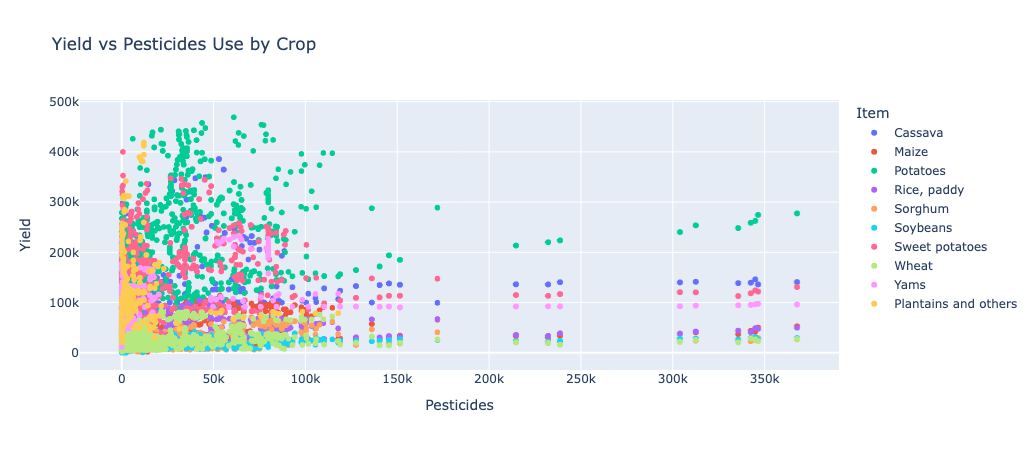

In [13]:
# since it is plotly and interactive so it will not show in github
from IPython.display import Image
Image(filename = "../static_files/yield_vs_pesticide_by_crop.png")

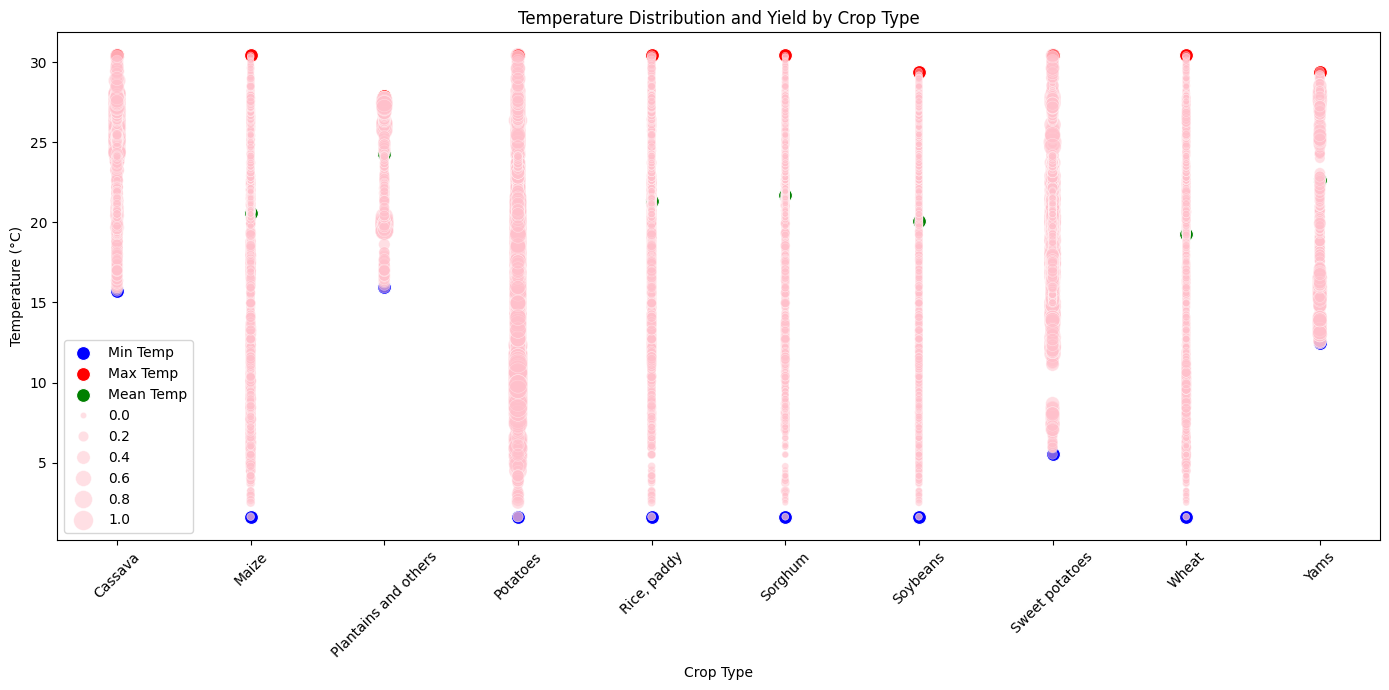

In [14]:
# source:
# https://github.com/jordanwheeler7/capstone-crop-yield/blob/main/crop_yield.ipynb

# Calculate the minimum, maximum, and average temperatures for each crop
temp_stats = df.groupby('Item')['avg_temp'].agg(['min', 'mean', 'max']).reset_index()

# Normalize the yield data to use for point sizes
df['yield_normalized'] = (df['Yield'] - df['Yield'].min()) / (df['Yield'].max() - df['Yield'].min())

# Initialize the matplotlib figure
plt.figure(figsize=(14, 7))

# Plot the min and max temperatures
sns.scatterplot(data=temp_stats, x='Item', y='min', color='blue', label='Min Temp', s=100)
sns.scatterplot(data=temp_stats, x='Item', y='max', color='red', label='Max Temp', s=100)

# Plot the mean temperatures
sns.scatterplot(data=temp_stats, x='Item', y='mean', color='green', label='Mean Temp', s=100)

# Plot all the individual temperature observations to show distribution
# Size represents normalized yield
sns.scatterplot(x='Item', y='avg_temp', size='yield_normalized', sizes=(20, 200), data=df, color='Pink', alpha=0.5)

# Improve the aesthetics
plt.xticks(rotation=45)
plt.title('Temperature Distribution and Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature (°C)')

# Place the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()